## **Required Imports**

In [ ]:
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## **Cities Data**

In [ ]:
cityData = pd.read_csv("/content/drive/MyDrive/DMV/country_name_code.csv", encoding = "latin")

## **API Call To Create Data**

In [ ]:
def generateWeatherData(cityData, limit):
  weatherDataSet = {
      "country" : [],
      "city_name" :[],
      "lon" : [],
      "lat" : [],
      "temp" : [],
      "pressure" : [],
      "humidity" : [],
      "wind_speed" : [],
  }
  for city in cityData.city_ascii[:limit]:
    try:
      api = f"https://api.openweathermap.org/data/2.5/weather?q={city},in&appid=a7860b9cdd53e399a319baf0f53f4cfa"
      requestObj = requests.get(api)
      jsonData = requestObj.json()
      # print(jsonData)
      weatherDataSet['country'].append(jsonData['sys']['country'])
      weatherDataSet['city_name'].append(jsonData['name'])
      weatherDataSet['lon'].append(jsonData['coord']['lon'])
      weatherDataSet['lat'].append(jsonData['coord']['lat'])
      weatherDataSet['temp'].append(jsonData['main']['temp'])
      weatherDataSet['pressure'].append(jsonData['main']['pressure'])
      weatherDataSet['humidity'].append(jsonData['main']['humidity'])
      weatherDataSet['wind_speed'].append(jsonData['wind']['speed'])

    except:
      pass

  df = pd.DataFrame(weatherDataSet)
  df.to_csv("weatherData.csv")
  return df


## **API Genereated Data**

In [ ]:
df = generateWeatherData(cityData, 500)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DMV/weatherData (1).csv')

In [ ]:
df.head()

,Unnamed: 0,country,city_name,lon,lat,temp,pressure,humidity,wind_speed
0,0,IN,Delhi,77.2167,28.6667,305.20,999,62,3.09
1,1,IN,Mumbai,72.8479,19.0144,300.14,1005,89,6.69
2,2,IN,Kolkata,88.3697,22.5697,305.12,998,70,3.09
3,3,IN,Bengaluru,77.6033,12.9762,303.37,1011,46,4.12
4,4,IN,Chennai,80.2785,13.0878,305.91,1008,76,1.03


## **Shape of data**

In [ ]:
df.shape

(445, 9)

## **Null Values**

In [ ]:
df.isna().sum()

Unnamed: 0    0
country       0
city_name     0
lon           0
lat           0
temp          0
pressure      0
humidity      0
wind_speed    0
dtype: int64

## **Duplicate Values Checking**

In [ ]:
len(df['city_name'].unique())

442

In [ ]:
df.duplicated().sum()

0

In [ ]:
df[df.duplicated()]["city_name"]

Series([], Name: city_name, dtype: object)

## **Droping Duplicate Values**

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.duplicated().sum()

0

## **Description**

In [ ]:
df.describe()

,Unnamed: 0,lon,lat,temp,pressure,humidity,wind_speed
count,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000
mean,222.000000,79.670257,22.163801,303.952921,1000.748315,63.424719,4.323056
std,128.604691,5.209744,5.807429,3.275750,3.827300,17.566523,2.091237
min,0.000000,69.366700,8.166700,288.120000,969.000000,23.000000,0.080000
25%,111.000000,75.850000,17.666700,301.730000,998.000000,51.000000,2.980000
50%,222.000000,78.166700,22.824400,304.020000,1001.000000,66.000000,4.060000
75%,333.000000,83.416700,26.496900,306.040000,1003.000000,76.000000,5.670000
max,444.000000,94.900000,34.300000,311.780000,1011.000000,98.000000,11.890000


## **Info**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 445 entries, 0 to 444
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  445 non-null    int64  
 1   country     445 non-null    object 
 2   city_name   445 non-null    object 
 3   lon         445 non-null    float64
 4   lat         445 non-null    float64
 5   temp        445 non-null    float64
 6   pressure    445 non-null    int64  
 7   humidity    445 non-null    int64  
 8   wind_speed  445 non-null    float64
dtypes: float64(4), int64(3), object(2)
memory usage: 34.8+ KB


## **Data Types**

In [ ]:
df.dtypes

Unnamed: 0      int64
country        object
city_name      object
lon           float64
lat           float64
temp          float64
pressure        int64
humidity        int64
wind_speed    float64
dtype: object

## **Droping unnecessary columns**

In [ ]:
df = df.drop(columns=['Unnamed: 0'])

In [ ]:
df.head()

,country,city_name,lon,lat,temp,pressure,humidity,wind_speed
0,IN,Delhi,77.2167,28.6667,305.20,999,62,3.09
1,IN,Mumbai,72.8479,19.0144,300.14,1005,89,6.69
2,IN,Kolkata,88.3697,22.5697,305.12,998,70,3.09
3,IN,Bengaluru,77.6033,12.9762,303.37,1011,46,4.12
4,IN,Chennai,80.2785,13.0878,305.91,1008,76,1.03


In [ ]:
tempWiseSorted = df.sort_values("temp", ascending=False)

In [ ]:
tempWiseSorted.head()

,country,city_name,lon,lat,temp,pressure,humidity,wind_speed
400,IN,Firozpur,74.6000,30.9167,311.78,994,34,3.27
387,IN,Kovilpatti,77.8667,9.1667,311.65,1003,23,3.41
190,IN,Gangānagar,73.8833,29.9167,311.52,995,32,3.54
205,IN,Thanjavur,79.1500,10.8000,311.46,1003,34,4.64
130,IN,Karur,78.0833,10.9500,311.11,1003,24,4.22


## **Top Countries with Maximum Temperature**

<Axes: xlabel='city_name', ylabel='temp'>

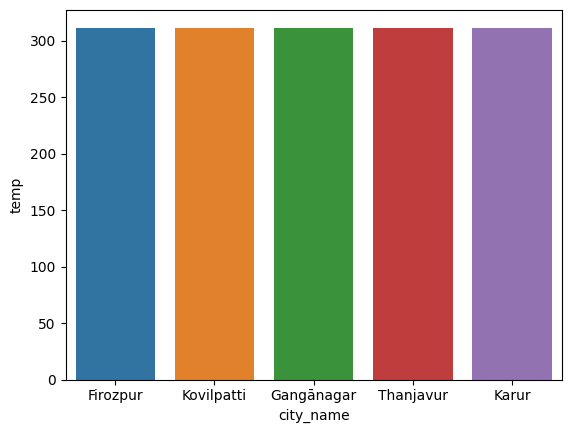

In [ ]:
sns.barplot(x=tempWiseSorted.iloc[:5,1], y=tempWiseSorted.iloc[:5,4])

## **Top 5 countries with maximum pressure**

<Axes: xlabel='city_name', ylabel='pressure'>

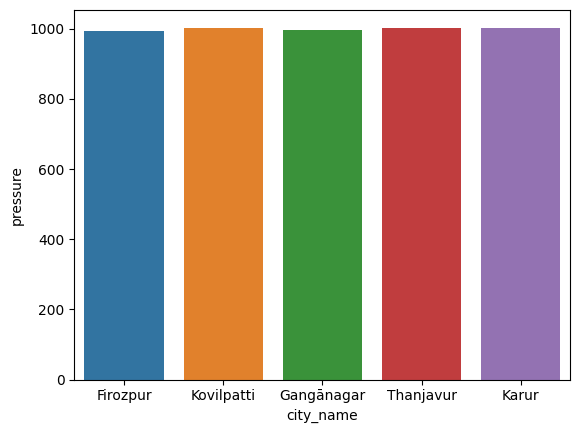

In [ ]:
sns.barplot(x=tempWiseSorted.iloc[:5,1], y=tempWiseSorted.iloc[:5,5])

## **Top 5 countries with maximum humidity**

<Axes: xlabel='city_name', ylabel='humidity'>

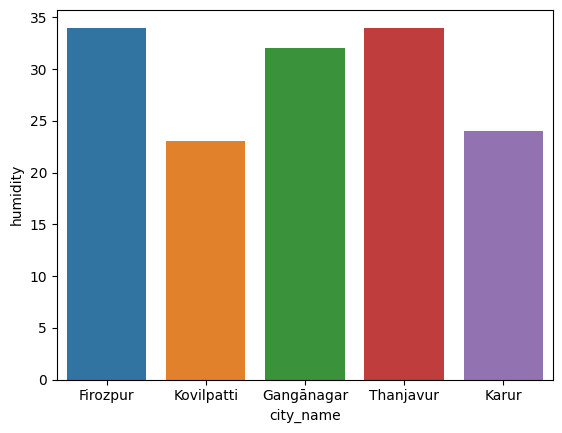

In [ ]:
sns.barplot(x=tempWiseSorted.iloc[:5,1], y=tempWiseSorted.iloc[:5,6])

## **Top 5 countries with maximum wind speed**

<Axes: xlabel='city_name', ylabel='wind_speed'>

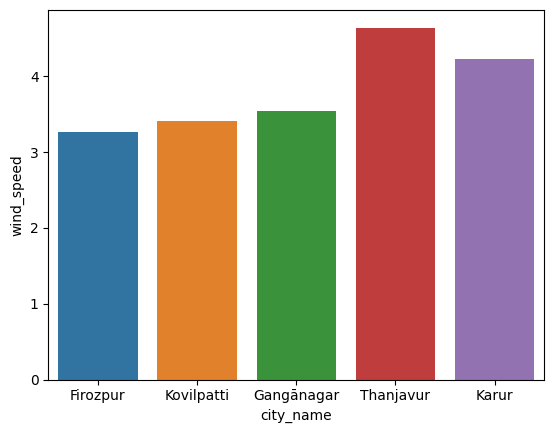

In [ ]:
sns.barplot(x=tempWiseSorted.iloc[:5,1], y=tempWiseSorted.iloc[:5,7])

## **Bar plot of average temperature by city**

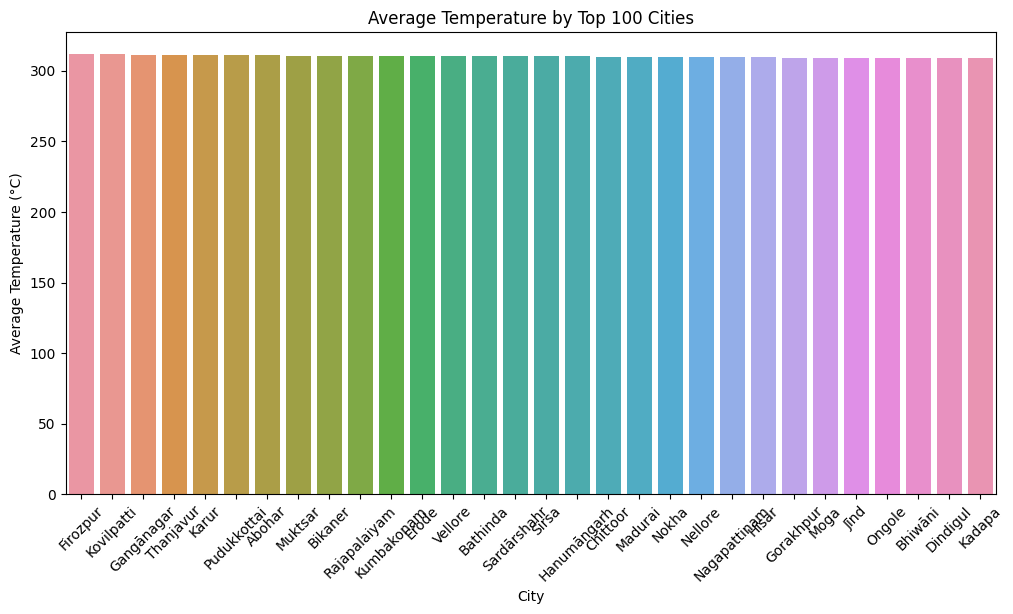

In [ ]:
avg_temp_by_city = df.groupby('city_name')['temp'].mean().sort_values(ascending=False)[:30]
# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_temp_by_city.index, y=avg_temp_by_city.values)
plt.title('Average Temperature by Top 100 Cities')
plt.xlabel('City')
plt.ylabel('Average Temperature (°C)')
plt.xticks(rotation=45)
plt.show()

## **Trend in Temperature**

<Axes: ylabel='temp'>

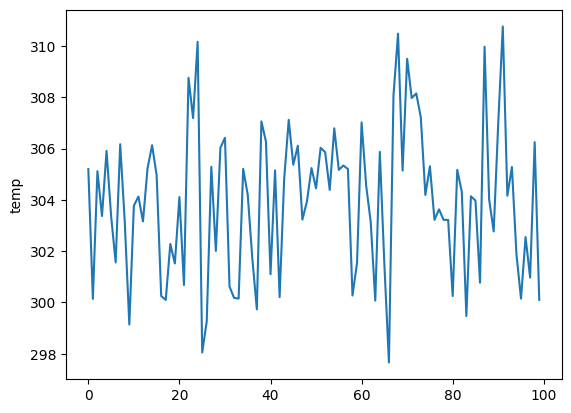

In [ ]:
sns.lineplot(df.iloc[:100, 4])

## **Humidity V/s Tempurature Trend**

<Axes: xlabel='temp', ylabel='humidity'>

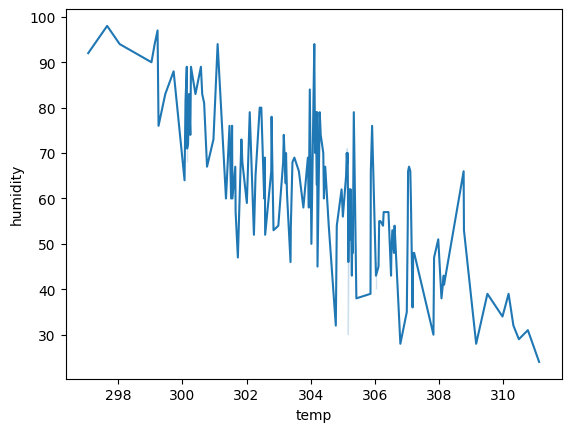

In [ ]:
sns.lineplot(x=df.iloc[:150, 4], y=df.iloc[:150,6])

## **Trend in Pressure V/s Humidity**

<Axes: xlabel='pressure', ylabel='humidity'>

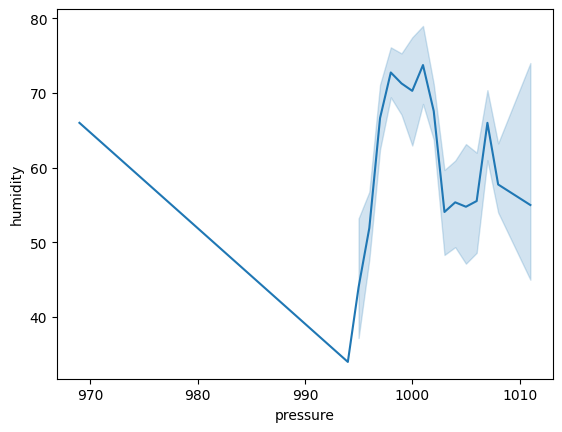

In [ ]:
sns.lineplot(x=df.iloc[:, 5], y=df.iloc[:,6])

## **Scatter plot of temperature vs. humidity**

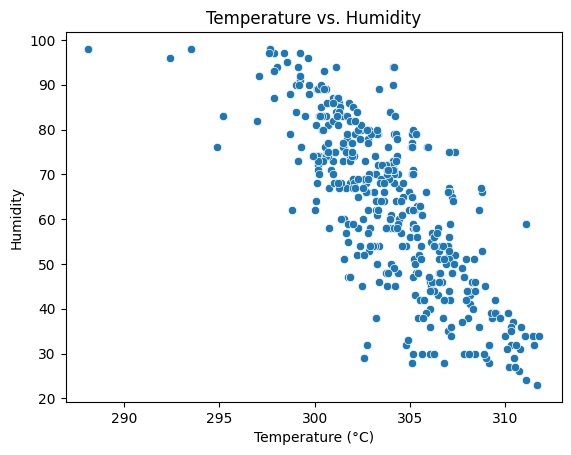

In [ ]:
sns.scatterplot(data=df, x='temp', y='humidity')
plt.title('Temperature vs. Humidity')
plt.xlabel('Temperature (°C)')
plt.ylabel('Humidity')
plt.show()

## **KDE plot of humidity distribution**

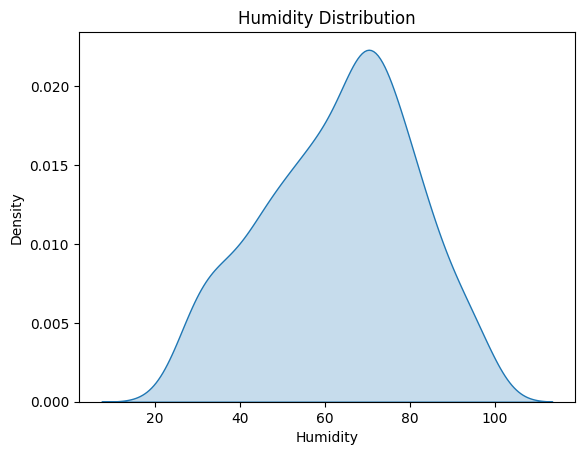

In [ ]:
sns.kdeplot(data=df, x='humidity', fill=True)
plt.title('Humidity Distribution')
plt.xlabel('Humidity')
plt.ylabel('Density')
plt.show()

## **Violin plot of wind speed by country**

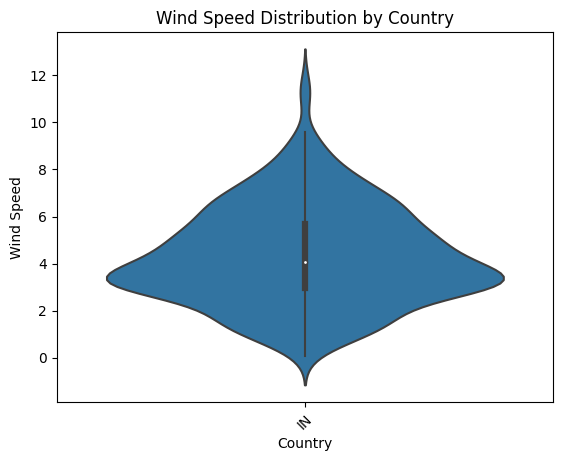

In [ ]:
sns.violinplot(data=df, x='country', y='wind_speed')
plt.title('Wind Speed Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Wind Speed')
plt.xticks(rotation=45)
plt.show()

## **Pair plot to understand Trend in each numerical features**

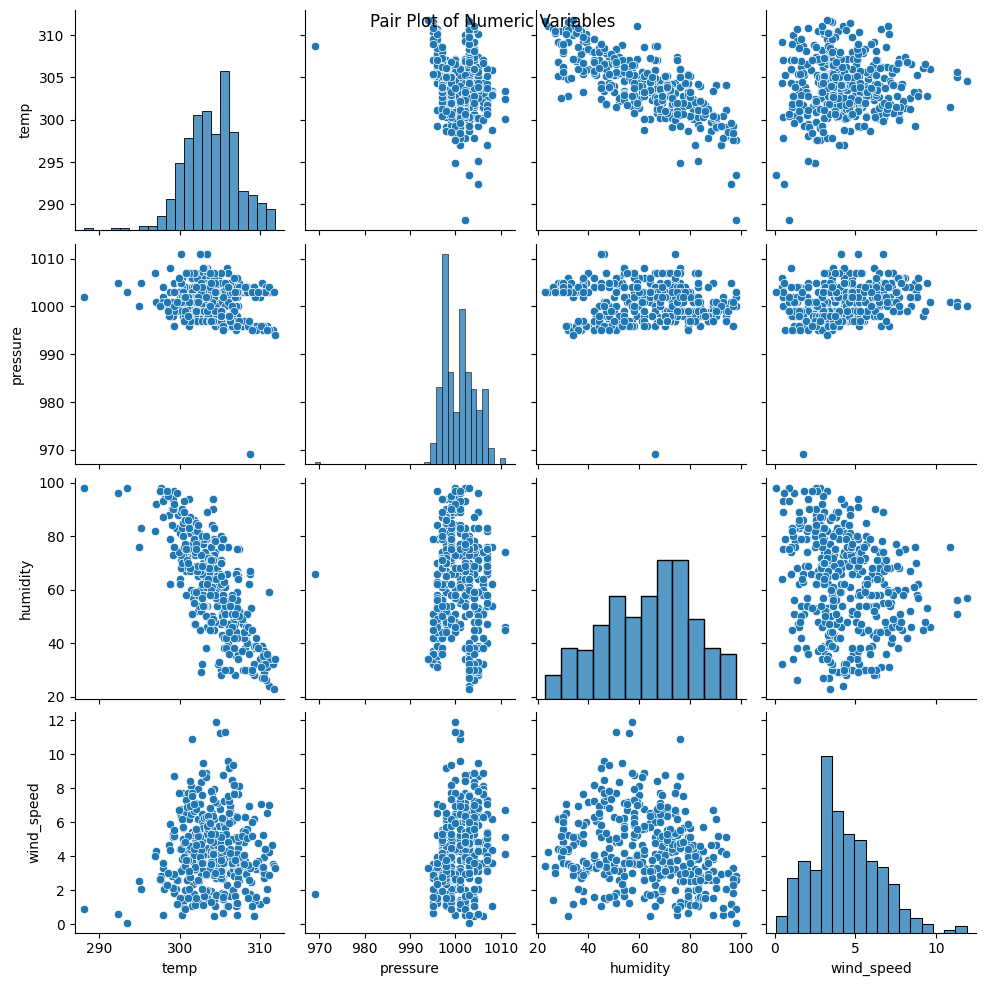

In [ ]:
sns.pairplot(df[['temp', 'pressure', 'humidity', 'wind_speed']])
plt.suptitle('Pair Plot of Numeric Variables')
plt.show()

## **Realation Between features**

<ipython-input-130-aa4f4450a243>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

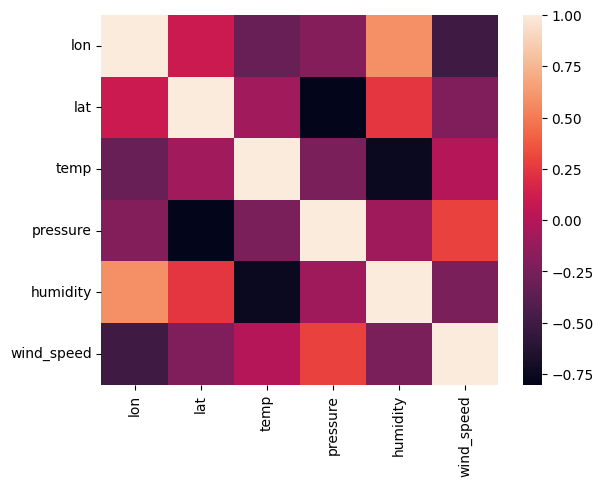

In [ ]:
sns.heatmap(df.corr())